<a href="https://colab.research.google.com/github/06Cata/Kaggle_Titanic/blob/main/Kaggle_titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境準備

In [183]:
import pandas as pd
import numpy as np
import seaborn as sb

# 讀取資料

In [165]:
url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/train.csv'

df_train = pd.read_csv(url)

df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

# 初步查看個欄位與'Survived'關係

In [184]:
# Pclass
from scipy.stats import gaussian_kde

# 計算密度估計
pclass_not_survived = df_train[df_train['Survived'] == 0]['Pclass']
pclass_survived = df_train[df_train['Survived'] == 1]['Pclass']

kde_not_survived = gaussian_kde(pclass_not_survived)
kde_survived = gaussian_kde(pclass_survived)

# 設置範圍
pclass_range = np.linspace(0, df_train['Pclass'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(pclass_range)
density_survived = kde_survived(pclass_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=pclass_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=pclass_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Pclass by Survival Status',
    xaxis_title='Pclass',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [168]:
# SibSp
from scipy.stats import gaussian_kde

# 計算密度估計
sibsp_not_survived = df_train[df_train['Survived'] == 0]['SibSp']
sibsp_survived = df_train[df_train['Survived'] == 1]['SibSp']

kde_not_survived = gaussian_kde(sibsp_not_survived)
kde_survived = gaussian_kde(sibsp_survived)

# 設置範圍
sibsp_range = np.linspace(0, df_train['SibSp'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sibsp_range)
density_survived = kde_survived(sibsp_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sibsp_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sibsp_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of SibSp by Survival Status',
    xaxis_title='SibSp',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()



In [185]:
# 0
# Age
from scipy.stats import gaussian_kde

# 計算密度估計
age_not_survived = df_train[df_train['Survived'] == 0]['Age']
age_survived = df_train[df_train['Survived'] == 1]['Age']

kde_not_survived = gaussian_kde(age_not_survived)
kde_survived = gaussian_kde(age_survived)

# 設置範圍
age_range = np.linspace(0, df_train['Age'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_range)
density_survived = kde_survived(age_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Age by Survival Status',
    xaxis_title='Age',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


ValueError: array must not contain infs or NaNs

In [186]:
# Parch

from scipy.stats import gaussian_kde

# 計算密度估計
parch_not_survived = df_train[df_train['Survived'] == 0]['Parch']
parch_survived = df_train[df_train['Survived'] == 1]['Parch']

kde_not_survived = gaussian_kde(parch_not_survived)
kde_survived = gaussian_kde(parch_survived)

# 設置範圍
parch_range = np.linspace(0, df_train['Parch'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(parch_range)
density_survived = kde_survived(parch_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=parch_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=parch_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Parch by Survival Status',
    xaxis_title='Parch',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()



In [187]:
# Fare
from scipy.stats import gaussian_kde

# 計算密度估計
fare_not_survived = df_train[df_train['Survived'] == 0]['Fare']
fare_survived = df_train[df_train['Survived'] == 1]['Fare']

kde_not_survived = gaussian_kde(fare_not_survived)
kde_survived = gaussian_kde(fare_survived)

# 設置範圍
fare_range = np.linspace(0, df_train['Fare'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(fare_range)
density_survived = kde_survived(fare_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=fare_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=fare_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Fare by Survival Status',
    xaxis_title='Fare',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


# 資料清理

In [188]:
print(df_train.info())
print()
print((df_train['Cabin'].isna().sum()/df_train.shape[0]*100).round(2))
print()
print(df_train.isna().sum())

# age 用性別、艙等平均補
# Cabin 刪除，缺少 77%
# Embarked 用眾數補

# sex轉為One-Hot
# Embarked轉為One-Hot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

77.1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtyp

In [189]:
print(df_train['Ticket'].value_counts())
# 不使用

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


In [190]:
# Age，用性別、艙等平均補
df_train['Age'].fillna(value=df_train.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [191]:
# Embarked，用眾數補
mode_embarked = df_train['Embarked'].mode()[0]

df_train['Embarked'].fillna(value=mode_embarked, inplace=True)
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [192]:
# 確認一下
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# 特徵工程

In [193]:
# 年齡多一欄，設為年齡組

bins = [0, 21, 65, 100]
labels = ['0-21', '22-65', '66-100']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_train['AgeGroup'] = df_train['AgeGroup'].cat.codes  # 轉換為數值

df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  AgeGroup  
0        0         A/5 21171   7.2500   NaN        S         1  
1        0          PC 17599  71.2833   C85        C         1  
2        0  STON/O2. 3101282   7.9250   NaN        S         1  
3        0            113803  53.1000  C123        S         1  
4        0            373450   8.0500   NaN        S         1  
..     ...               ...      ...   ...      ...       ...  
886      0            211536  13.0000   NaN        S         1  
887      0            112053  30.0000   B42        S         0  
888      2        W./C. 6607  23.4500   NaN        S         1  
889      0            111369  30.0000  C148        C         1  
890      0            370376   7.7500   NaN        Q         1  

[891 rows x 13 columns]

In [194]:
# 家屬多設一欄，總親屬人數

df_train['Family_size']	= df_train['SibSp'].astype(int) + df_train['Parch'].astype(int)

df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  AgeGroup  Family_size  
0        0         A/5 21171   7.2500   NaN        S         1            1  
1        0          PC 17599  71.2833   C85        C         1            1  
2        0  STON/O2. 3101282   7.9250   NaN        S         1            0  
3        0            113803  53.1000  C123        S         1            1  
4        0            373450   8.0500   NaN        S         1            0  
..     ...               ...      ...   ...      ...       ...          ...  
886      0            211536  13.0000   NaN        S         1            0  
887      0            112053  30.0000   B42        S         0            0  
888      2        W./C. 6607  23.4500   NaN        S         1            3  
889      0            111369  30.0000  C148        C         1            0  
890      0            370376   7.7500   NaN        Q         1            0  

[891 rows x 14 columns]

In [195]:
# df_train_2，複製一張表
# Sex、Embarked轉為One-Hot

df_train_2 = df_train.copy()
df_train_2['Sex_new'] = df_train_2['Sex'].copy()
df_train_2['Embarked_new'] = df_train_2['Embarked'].copy()
df_train_2 = pd.get_dummies(df_train_2, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])

df_train_2['Sex_new_female'] = df_train_2['Sex_new_female'].astype(int)
df_train_2['Sex_new_male'] = df_train_2['Sex_new_male'].astype(int)
df_train_2['Embarked_new_C'] = df_train_2['Embarked_new_C'].astype(int)
df_train_2['Embarked_new_Q'] = df_train_2['Embarked_new_Q'].astype(int)
df_train_2['Embarked_new_S'] = df_train_2['Embarked_new_S'].astype(int)

df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  AgeGroup  Family_size  \
0        0         A/5 21171   7.2500   NaN        S         1            1   
1        0          PC 17599  71.2833   C85        C         1            1   
2        0  STON/O2. 3101282   7.9250   NaN        S         1            0   
3        0            113803  53.1000  C123        S         1            1   
4        0            373450   8.0500   NaN        S         1            0   
..     ...               ...      ...   ...      ...       ...          ...   
886      0            211536  13.0000   NaN        S         1            0   
887      0            112053  30.0000   B42        S         0            0   
888      2        W./C. 6607  23.4500   NaN        S         1            3   
889      0            111369  30.0000  C148        C         1            0   
890      0            370376   7.7500   NaN        Q         1            0   

     Sex_new_female  Sex_new_male  Embarked_new_C  Embarked_new_Q  \
0                 0             1               0               0   
1                 1             0               1               0   
2                 1             0               0               0   
3                 1             0               0               0   
4                 0             1               0               0   
..              ...           ...             ...             ...   
886               0             1               0               0   
887               1             0               0               0   
888               1             0               0               0   
889               0             1               1               0   
890               0             1               0               1   

     Embarked_new_S  
0                 1  
1                 0  
2                 1  
3                 1  
4                 1  
..              ...  
886               1  
887               1  
888               1  
889               0  
890               0  

[891 rows x 19 columns]

In [196]:
# Sex、Embarked轉為LabelEncoder

# !pip install category_encoders
# from category_encoders.target_encoder import TargetEncoder
# target_encoder = TargetEncoder()
# df_train['Embarked'] = target_encoder.fit_transform(df_train['Embarked'])

from sklearn.preprocessing import LabelEncoder

label_encoder_sex_labeled = LabelEncoder()
df_train_2['Sex_labeled'] = label_encoder_sex_labeled.fit_transform(df_train_2['Sex'])

label_encoder_embarked_labeled = LabelEncoder()
df_train_2['Embarked_labeled'] = label_encoder_embarked_labeled.fit_transform(df_train_2['Embarked'])

df_train_2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male  27.00      0   
887                       Graham, Miss. Margaret Edith  female  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.75      1   
889                              Behr, Mr. Karl Howell    male  26.00      0   
890                                Dooley, Mr. Patrick    male  32.00      0   

     Parch            Ticket     Fare  ... Embarked AgeGroup  Family_size  \
0        0         A/5 21171   7.2500  ...        S        1            1   
1        0          PC 17599  71.2833  ...        C        1            1   
2        0  STON/O2. 3101282   7.9250  ...        S        1            0   
3        0            113803  53.1000  ...        S        1            1   
4        0            373450   8.0500  ...        S        1            0   
..     ...               ...      ...  ...      ...      ...          ...   
886      0            211536  13.0000  ...        S        1            0   
887      0            112053  30.0000  ...        S        0            0   
888      2        W./C. 6607  23.4500  ...        S        1            3   
889      0            111369  30.0000  ...        C        1            0   
890      0            370376   7.7500  ...        Q        1            0   

     Sex_new_female  Sex_new_male  Embarked_new_C  Embarked_new_Q  \
0                 0             1               0               0   
1                 1             0               1               0   
2                 1             0               0               0   
3                 1             0               0               0   
4                 0             1               0               0   
..              ...           ...             ...             ...   
886               0             1               0               0   
887               1             0               0               0   
888               1             0               0               0   
889               0             1               1               0   
890               0             1               0               1   

     Embarked_new_S  Sex_labeled  Embarked_labeled  
0                 1            1                 2  
1                 0            0                 0  
2                 1            0                 2  
3                 1            0                 2  
4                 1            1                 2  
..              ...          ...               ...  
886               1            1                 2  
887               1            0                 2  
888               1            0                 2  
889               0            1                 0  
890               0            1                 1  

[891 rows x 21 columns]

In [197]:
# 'Sex' 列的標籤對應關係
sex_mapping = dict(zip(label_encoder_sex_labeled.classes_, label_encoder_sex_labeled.transform(label_encoder_sex_labeled.classes_)))
print("Sex mapping:", sex_mapping)

# 'Embarked' 列的標籤對應關係
embarked_mapping = dict(zip(label_encoder_embarked_labeled.classes_, label_encoder_embarked_labeled.transform(label_encoder_embarked_labeled.classes_)))
print("Embarked mapping:", embarked_mapping)

Sex mapping: {'female': 0, 'male': 1}
Embarked mapping: {'C': 0, 'Q': 1, 'S': 2}


# 繪製關聯性圖

In [198]:
!pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [199]:
# 0
# Sex_labeled

from scipy.stats import gaussian_kde

# 計算密度估計
sex_not_survived = df_train_2[df_train_2['Survived'] == 0]['Sex_labeled']
sex_survived = df_train_2[df_train_2['Survived'] == 1]['Sex_labeled']

kde_not_survived = gaussian_kde(sex_not_survived)
kde_survived = gaussian_kde(sex_survived)

# 設置範圍
sex_range = np.linspace(0, df_train_2['Sex_labeled'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sex_range)
density_survived = kde_survived(sex_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sex_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sex_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Sex_labeled by Survival Status',
    xaxis_title='Sex_labeled',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [200]:
# 0
# Embarked_labeled

from scipy.stats import gaussian_kde

# 計算密度估計
embarked_not_survived = df_train_2[df_train_2['Survived'] == 0]['Embarked_labeled']
embarked_survived = df_train_2[df_train_2['Survived'] == 1]['Embarked_labeled']

kde_not_survived = gaussian_kde(embarked_not_survived)
kde_survived = gaussian_kde(embarked_survived)

# 設置範圍
embarked_range = np.linspace(0, df_train_2['Embarked_labeled'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(embarked_range)
density_survived = kde_survived(embarked_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=embarked_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=embarked_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Embarked_labeled by Survival Status',
    xaxis_title='Embarked_labeled',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [201]:
# 0
# AgeGroup

from scipy.stats import gaussian_kde

# 計算密度估計
age_group_not_survived = df_train_2[df_train_2['Survived'] == 0]['AgeGroup']
age_group_survived = df_train_2[df_train_2['Survived'] == 1]['AgeGroup']

kde_not_survived = gaussian_kde(age_group_not_survived)
kde_survived = gaussian_kde(age_group_survived)

# 設置範圍
age_group_range = np.linspace(0, df_train_2['AgeGroup'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_group_range)
density_survived = kde_survived(age_group_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_group_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_group_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of AgeGroup by Survival Status',
    xaxis_title='AgeGroup',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [238]:
# 0
# Age
from scipy.stats import gaussian_kde

# 計算密度估計
age_not_survived = df_train[df_train['Survived'] == 0]['Age']
age_survived = df_train[df_train['Survived'] == 1]['Age']

kde_not_survived = gaussian_kde(age_not_survived)
kde_survived = gaussian_kde(age_survived)

# 設置範圍
age_range = np.linspace(0, df_train['Age'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_range)
density_survived = kde_survived(age_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Age by Survival Status',
    xaxis_title='Age',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [203]:
# 0
# Family_size

from scipy.stats import gaussian_kde

# 計算密度估計
family_size_not_survived = df_train_2[df_train_2['Survived'] == 0]['Family_size']
family_size_survived = df_train_2[df_train_2['Survived'] == 1]['Family_size']

kde_not_survived = gaussian_kde(family_size_not_survived)
kde_survived = gaussian_kde(family_size_survived)

# 設置範圍
family_size_range = np.linspace(0, df_train_2['Family_size'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(family_size_range)
density_survived = kde_survived(family_size_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=family_size_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=family_size_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Family size by Survival Status',
    xaxis_title='Family size',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


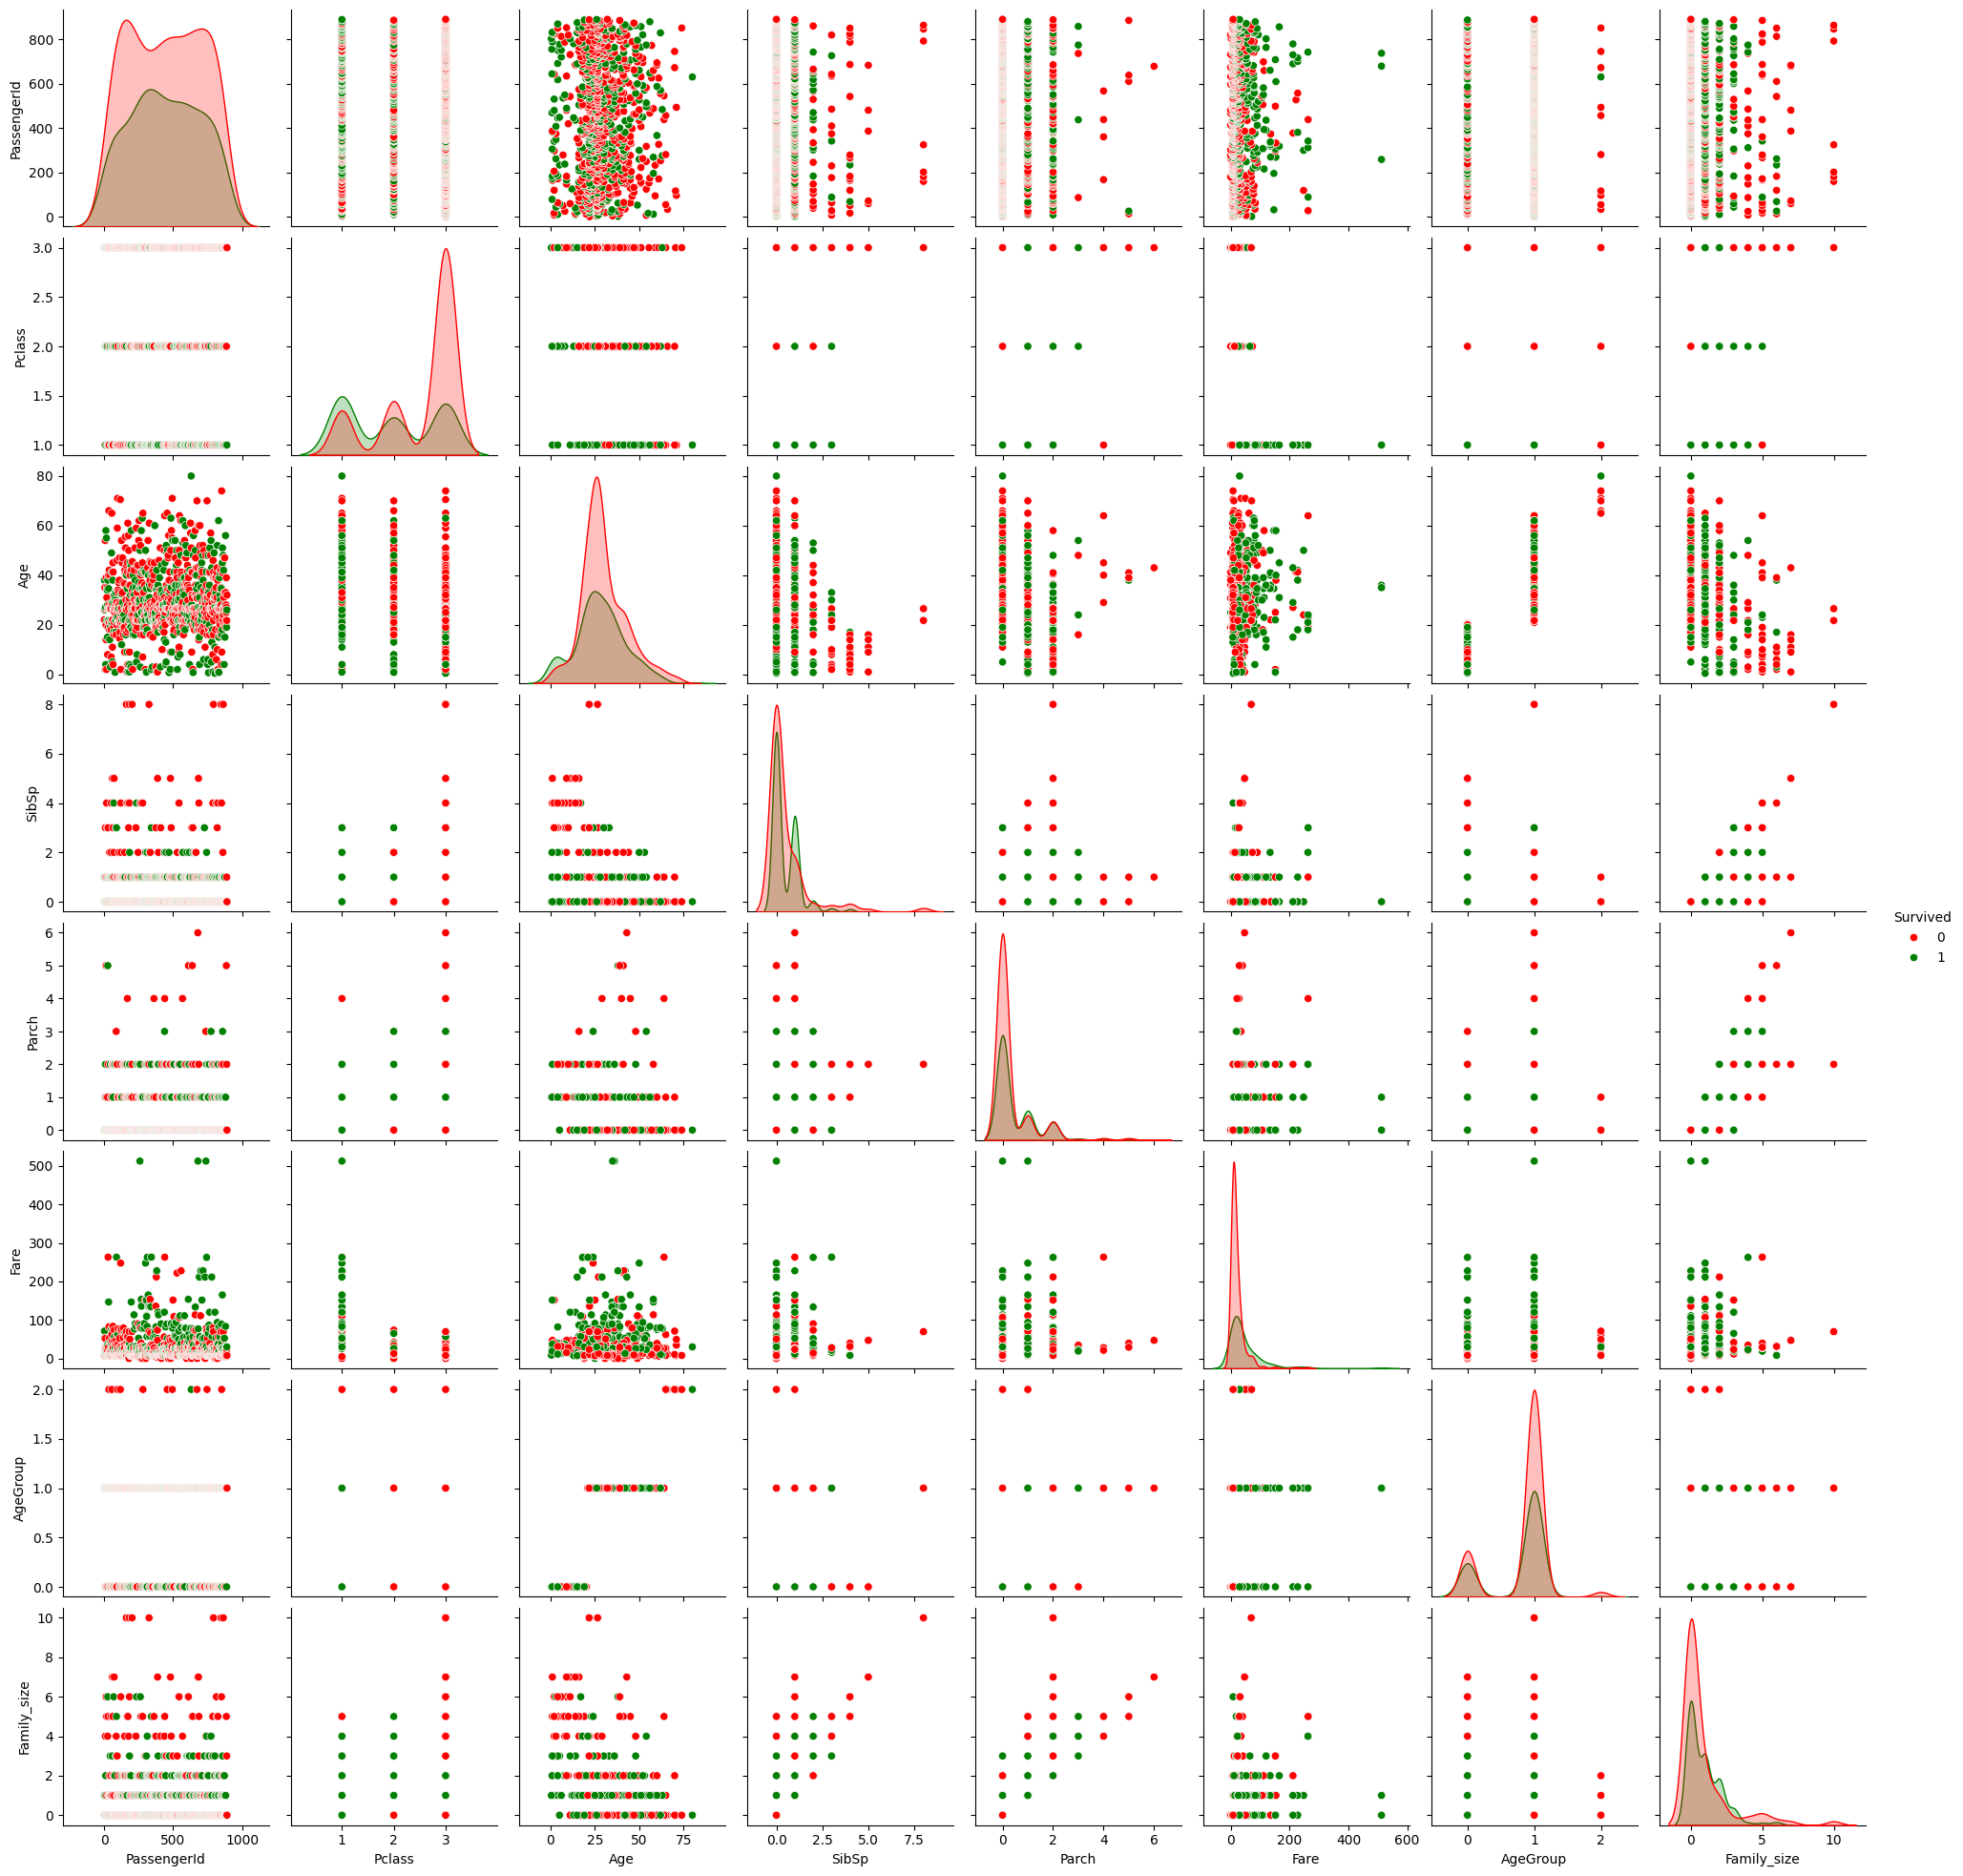

In [204]:
# 查看關聯性
# 1

# 選取數值欄位
df_encoded = df_train.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train, hue="Survived", palette=palette)

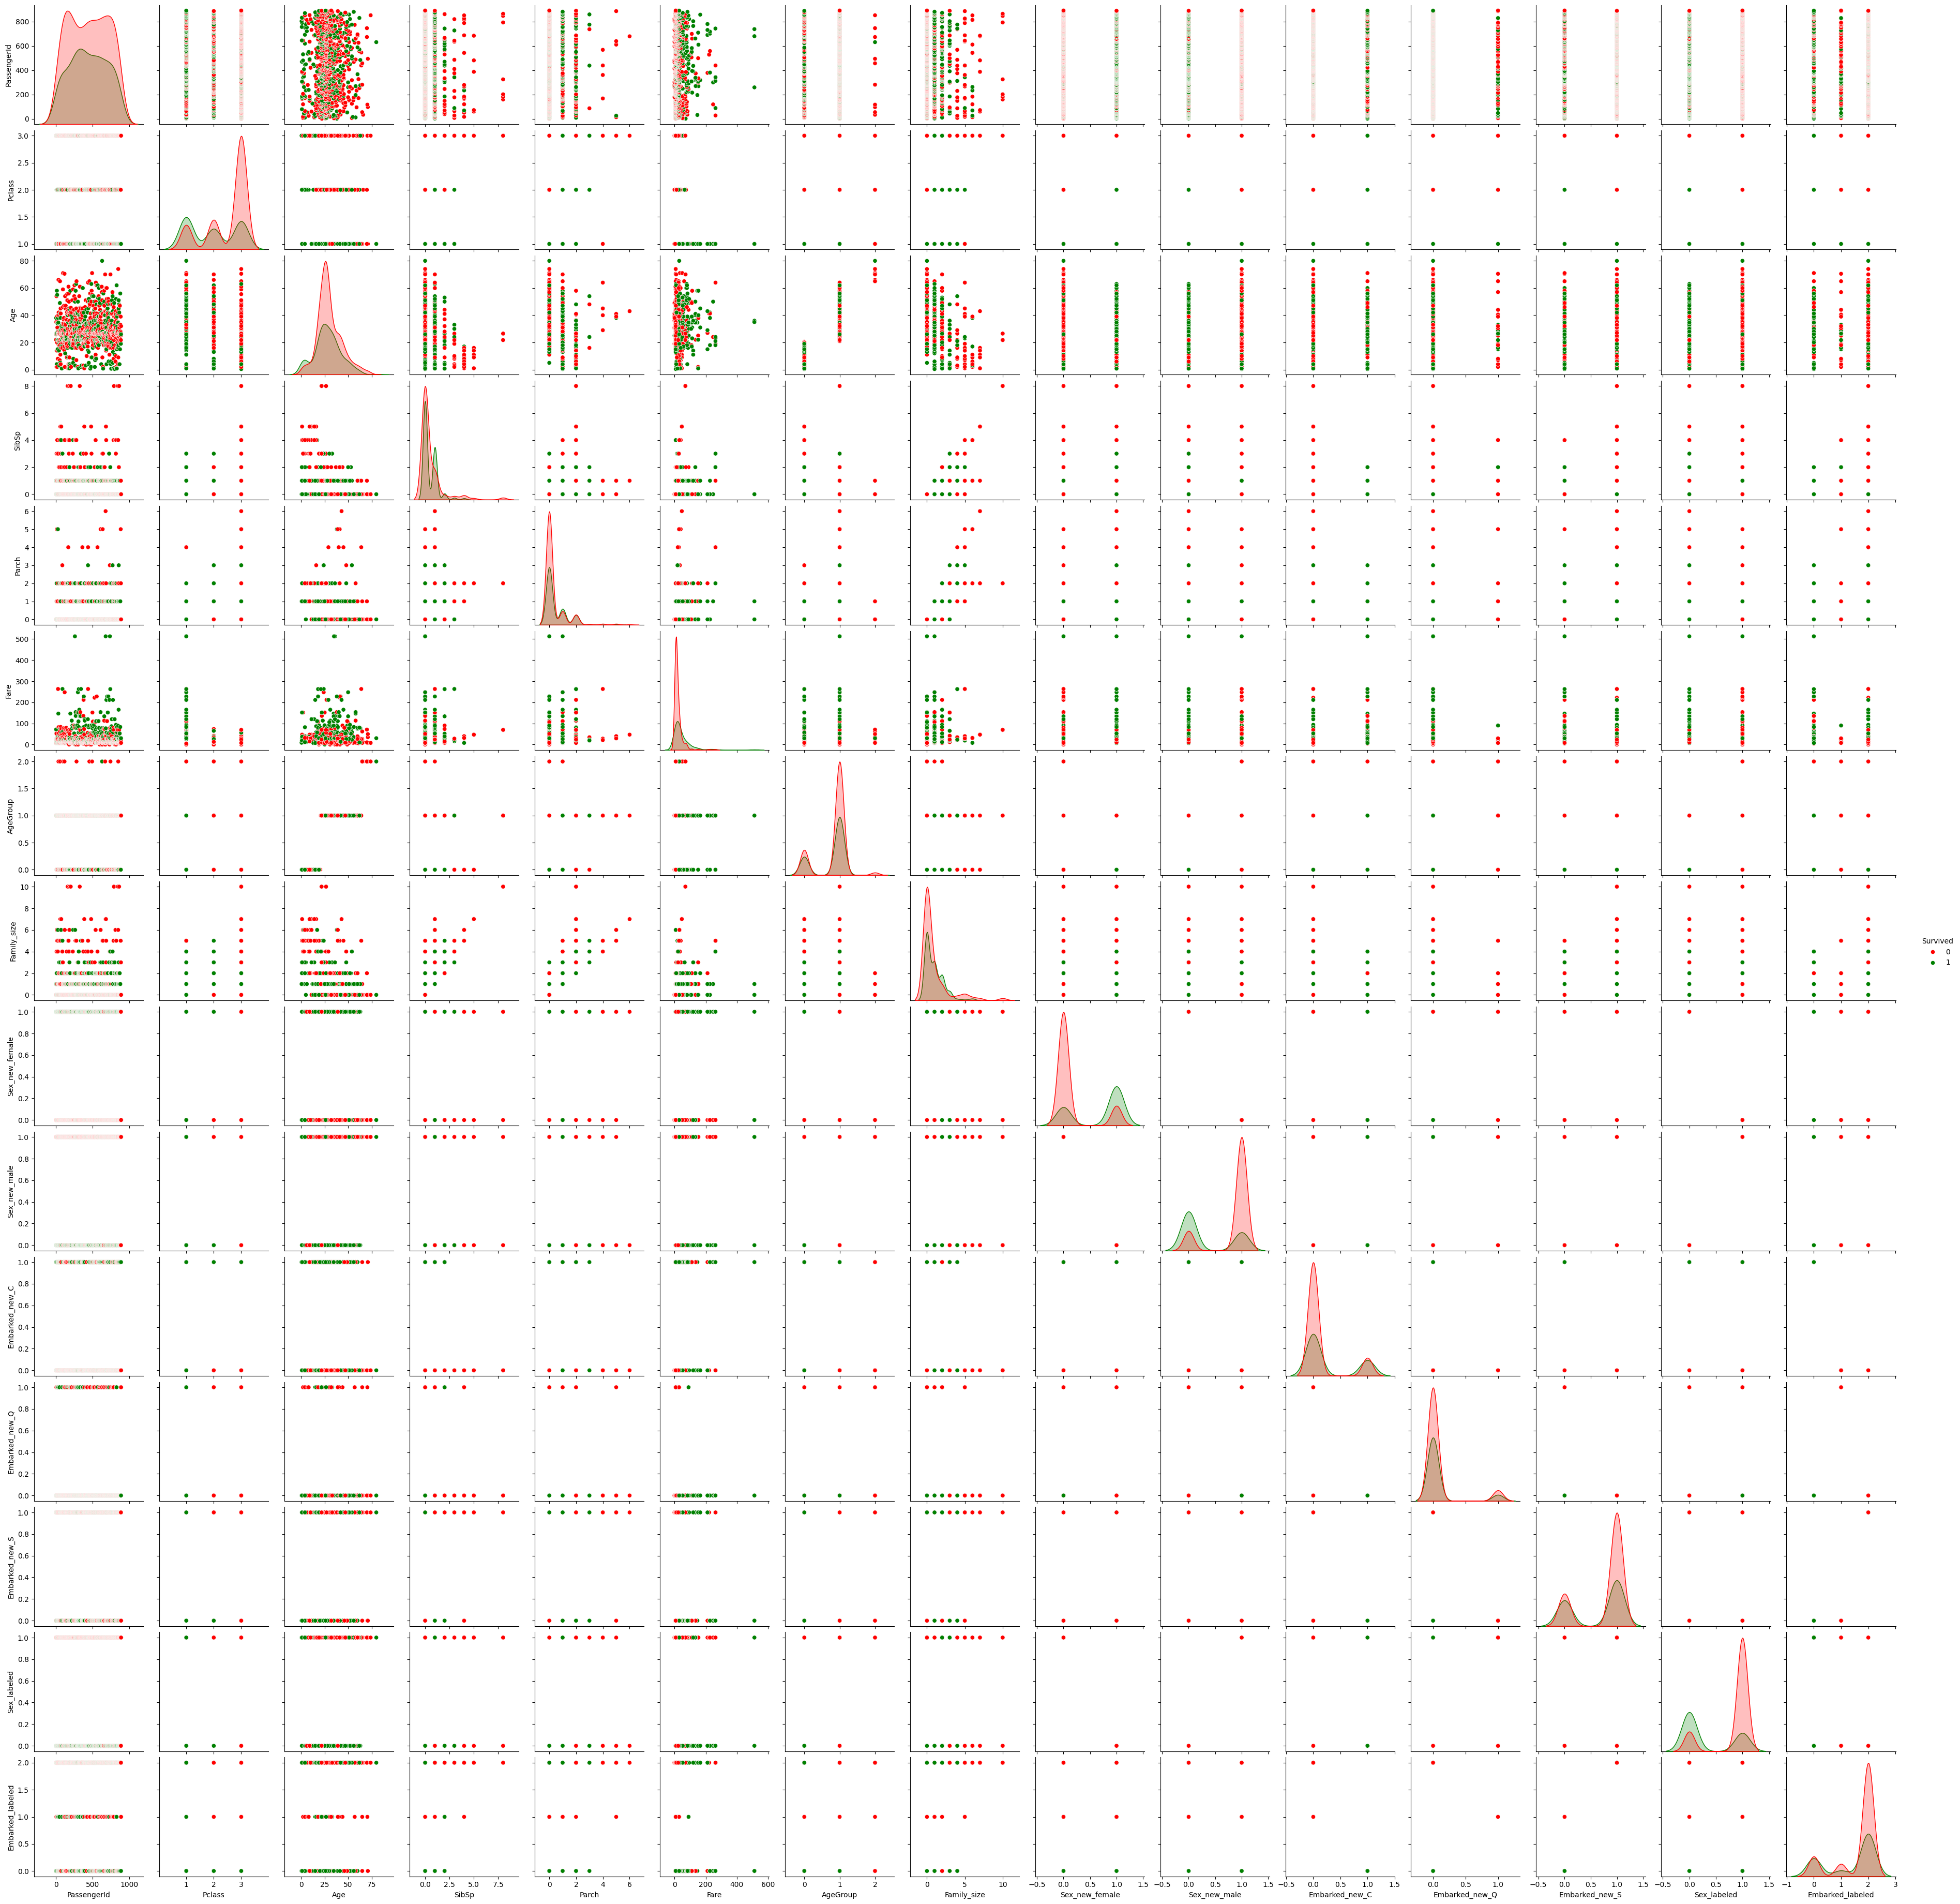

In [205]:
# 1

# 選取數值欄位
df_encoded_2 = df_train_2.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train_2, hue="Survived", palette=palette)

In [206]:
# 2

# 選取數值欄位
df_encoded_2 = df_train_2.select_dtypes(include=[np.number])

# 相關係數矩陣
correlation_matrix = df_encoded_2.corr()
correlation_matrix

PassengerId  Survived    Pclass       Age     SibSp  \
PassengerId          1.000000 -0.005007 -0.035144  0.039636 -0.057527   
Survived            -0.005007  1.000000 -0.338481 -0.067485 -0.035322   
Pclass              -0.035144 -0.338481  1.000000 -0.407015  0.083081   
Age                  0.039636 -0.067485 -0.407015  1.000000 -0.251313   
SibSp               -0.057527 -0.035322  0.083081 -0.251313  1.000000   
Parch               -0.001652  0.081629  0.018443 -0.180705  0.414838   
Fare                 0.012658  0.257307 -0.549500  0.118308  0.159651   
AgeGroup             0.005455 -0.088143 -0.171214  0.688097 -0.232936   
Family_size         -0.040143  0.016639  0.065997 -0.262041  0.890712   
Sex_new_female      -0.042939  0.543351 -0.131900 -0.112851  0.114631   
Sex_new_male         0.042939 -0.543351  0.131900  0.112851 -0.114631   
Embarked_new_C      -0.001205  0.168240 -0.243292  0.041504 -0.059528   
Embarked_new_Q      -0.033606  0.003650  0.221009 -0.084069 -0.026354   
Embarked_new_S       0.022204 -0.149683  0.074053  0.016545  0.068734   
Sex_labeled          0.042939 -0.543351  0.131900  0.112851 -0.114631   
Embarked_labeled     0.013128 -0.167675  0.162098 -0.011184  0.068230   

                     Parch      Fare  AgeGroup  Family_size  Sex_new_female  \
PassengerId      -0.001652  0.012658  0.005455    -0.040143       -0.042939   
Survived          0.081629  0.257307 -0.088143     0.016639        0.543351   
Pclass            0.018443 -0.549500 -0.171214     0.065997       -0.131900   
Age              -0.180705  0.118308  0.688097    -0.262041       -0.112851   
SibSp             0.414838  0.159651 -0.232936     0.890712        0.114631   
Parch             1.000000  0.216225 -0.229280     0.783111        0.245489   
Fare              0.216225  1.000000  0.021911     0.217138        0.182333   
AgeGroup         -0.229280  0.021911  1.000000    -0.273749       -0.097021   
Family_size       0.783111  0.217138 -0.273749     1.000000        0.200988   
Sex_new_female    0.245489  0.182333 -0.097021     0.200988        1.000000   
Sex_new_male     -0.245489 -0.182333  0.097021    -0.200988       -1.000000   
Embarked_new_C   -0.011069  0.269335  0.019465    -0.046215        0.082853   
Embarked_new_Q   -0.081228 -0.117216  0.062464    -0.058592        0.074115   
Embarked_new_S    0.060814 -0.162184 -0.056361     0.077359       -0.119224   
Sex_labeled      -0.245489 -0.182333  0.097021    -0.200988       -1.000000   
Embarked_labeled  0.039798 -0.224719 -0.041437     0.066516       -0.108262   

                  Sex_new_male  Embarked_new_C  Embarked_new_Q  \
PassengerId           0.042939       -0.001205       -0.033606   
Survived             -0.543351        0.168240        0.003650   
Pclass                0.131900       -0.243292        0.221009   
Age                   0.112851        0.041504       -0.084069   
SibSp                -0.114631       -0.059528       -0.026354   
Parch                -0.245489       -0.011069       -0.081228   
Fare                 -0.182333        0.269335       -0.117216   
AgeGroup              0.097021        0.019465        0.062464   
Family_size          -0.200988       -0.046215       -0.058592   
Sex_new_female       -1.000000        0.082853        0.074115   
Sex_new_male          1.000000       -0.082853       -0.074115   
Embarked_new_C       -0.082853        1.000000       -0.148258   
Embarked_new_Q       -0.074115       -0.148258        1.000000   
Embarked_new_S        0.119224       -0.782742       -0.499421   
Sex_labeled           1.000000       -0.082853       -0.074115   
Embarked_labeled      0.108262       -0.936273       -0.208581   

                  Embarked_new_S  Sex_labeled  Embarked_labeled  
PassengerId             0.022204     0.042939          0.013128  
Survived               -0.149683    -0.543351         -0.167675  
Pclass                  0.074053     0.131900          0.162098  
Age                     0.016545     0.112851

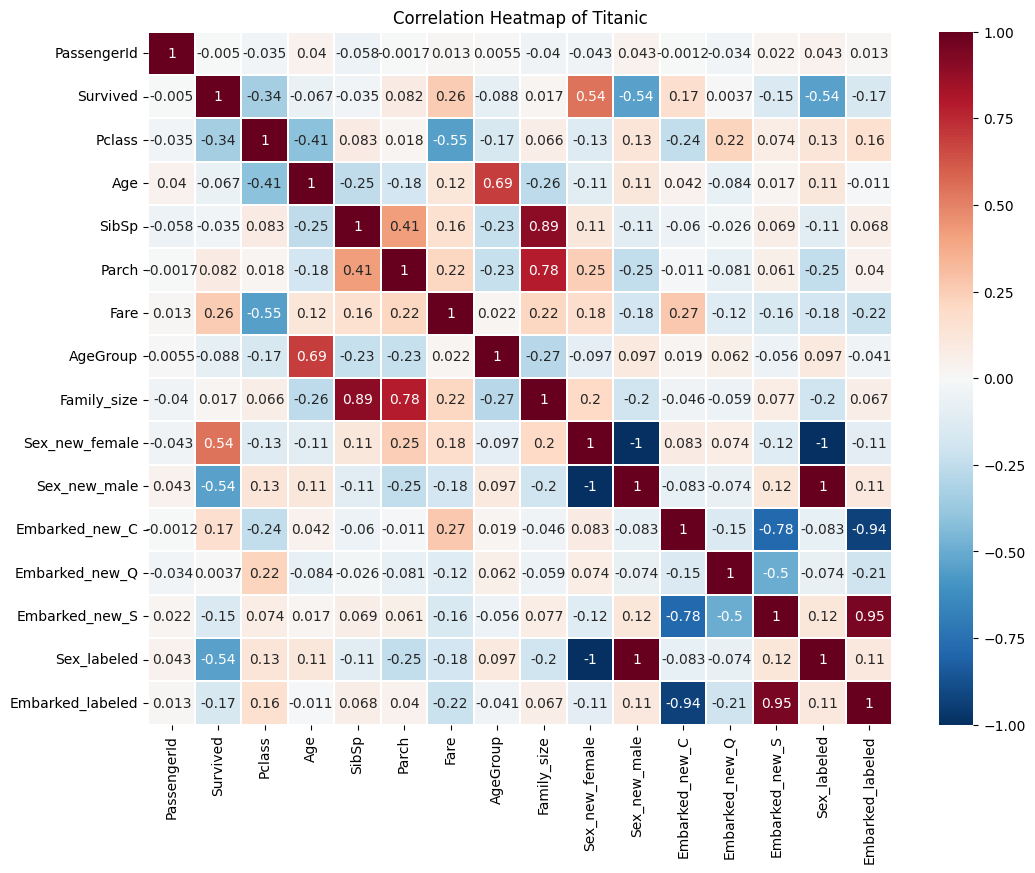

Survived            1.000000
Sex_new_female      0.543351
Fare                0.257307
Embarked_new_C      0.168240
Parch               0.081629
Family_size         0.016639
Embarked_new_Q      0.003650
PassengerId        -0.005007
SibSp              -0.035322
Age                -0.067485
AgeGroup           -0.088143
Embarked_new_S     -0.149683
Embarked_labeled   -0.167675
Pclass             -0.338481
Sex_new_male       -0.543351
Sex_labeled        -0.543351
Name: Survived, dtype: float64


In [207]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r',linewidths=0.2)
fig=plt.gcf()
plt.title("Correlation Heatmap of Titanic")
plt.show()

print(correlation_matrix['Survived'].sort_values(ascending=False))

# 性別: 女性 > 男性

# 艙等: 高艙等 > 低艙等
# 艙位等級與存活呈現負相關。1為一等艙，表示越高等級的艙位，存活率越高

# 票價: 高票價 > 低票價
# 票價與存活呈現正相關，票價越高，存活率越高

# 登船港口: Cherbourg > Southampton

# Parch 相關係數為 0.082，有父母或子女在船上的乘客，存活率略高

# SibSp 相關係數為 -0.035，有兄弟姐妹或配偶在船上的乘客，存活率的更低，但影響非常小

# Family_size 為 0.017，家庭成員總數與存活率幾乎沒有相關性

# 年齡組相關係數為 -0.088，年齡較大的乘客，存活率略低



In [208]:
# 查看年齡分怖

## matplotlib
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df_train_2['Age'], color='skyblue')
# plt.title('Age Quartiles')
# plt.xlabel('Age')
# plt.show()


fig = px.box(df_train_2, y='Age', points='all', color_discrete_sequence=['blue'])

#
fig.update_layout(
    title='Age Quartiles',
    yaxis_title='Age',
    xaxis_title='',
    width=800,
    height=600
)

fig.show()

In [209]:
# 3
# 各年齡組存活率

# agegroup_survival = df_train_2.groupby('AgeGroup')['Survived'].mean()

# #
# plt.figure(figsize=(10, 6))
# agegroup_survival.plot(kind='bar', color='skyblue')
# plt.title('Survival Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=0)
# plt.show()

# #
# print(agegroup_survival)



agegroup_survival = df_train_2.groupby('AgeGroup')['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by Age Group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'Age Group'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

In [210]:
# 3
# 各年齡組存活率

agegroup_survival = df_train_2.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by AgeGroup and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'AgeGroup'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

In [211]:
# 3
# 各年齡組存活人數

agegroup_survival_counts = df_train_2.groupby(['AgeGroup', 'Survived']).size().unstack()

# 顯示未存活的人數
trace1 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[0],
    name='Not Survived',
    marker_color='lightcoral'
)

# 顯示存活的人數
trace2 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[1],
    name='Survived',
    marker_color='lightgreen'
)

#
fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(barmode='group')

fig.update_layout(
    title='Passenger Count by Age Group and Survival Status',
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Survival Status',
    width=1000,
    height=600
)

fig.show()

#
print(agegroup_survival_counts)

Survived    0    1
AgeGroup          
0          98   82
1         441  259
2          10    1


In [212]:
# 4
# 各艙等存活率

pclass_survival = df_train_2.groupby('Pclass')['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [213]:
# 4
# 各艙等存活率

# sns.countplot(x='Embarked', hue='Survived', data=df_train_2)
# plt.xlabel('Embarked')
# plt.ylabel('Count')
# plt.title('Survived count by Embarked')
# plt.show()



pclass_sex_survival = df_train_2.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_sex_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [214]:
# 5
# 各港口存活率

embarked_survival = df_train_2.groupby('Embarked')['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [215]:
# 5
# 各港口存活率

embarked_survival = df_train_2.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


# 特徵重要性

In [216]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded_2.drop(['Survived'], axis=1)
y = df_encoded_2['Survived']

model = RandomForestClassifier()

model.fit(X, y)

# 特徵重要性
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


             Feature  Importance
5               Fare    0.177818
0        PassengerId    0.173671
2                Age    0.153156
8     Sex_new_female    0.109645
13       Sex_labeled    0.086343
9       Sex_new_male    0.079158
1             Pclass    0.073524
7        Family_size    0.043752
3              SibSp    0.029933
4              Parch    0.023081
6           AgeGroup    0.017669
14  Embarked_labeled    0.012541
10    Embarked_new_C    0.008199
12    Embarked_new_S    0.007741
11    Embarked_new_Q    0.003770


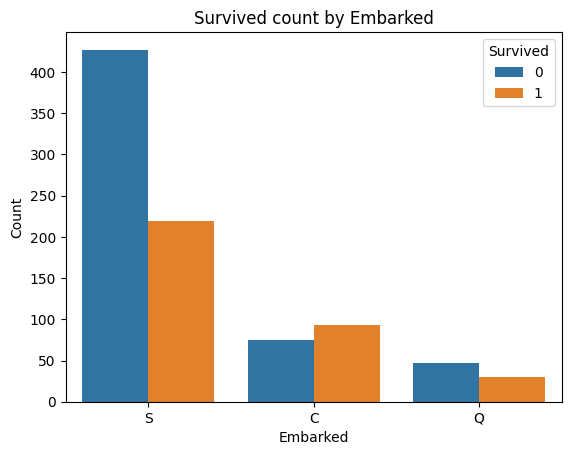

In [217]:
sns.countplot(x='Embarked', hue='Survived', data=df_train_2)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survived count by Embarked')
plt.show()

# Baseline、ML

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


In [247]:
df_encoded_2

PassengerId  Survived  Pclass    Age  SibSp  Parch     Fare  AgeGroup  \
0              1         0       3  22.00      1      0   7.2500         1   
1              2         1       1  38.00      1      0  71.2833         1   
2              3         1       3  26.00      0      0   7.9250         1   
3              4         1       1  35.00      1      0  53.1000         1   
4              5         0       3  35.00      0      0   8.0500         1   
..           ...       ...     ...    ...    ...    ...      ...       ...   
886          887         0       2  27.00      0      0  13.0000         1   
887          888         1       1  19.00      0      0  30.0000         0   
888          889         0       3  21.75      1      2  23.4500         1   
889          890         1       1  26.00      0      0  30.0000         1   
890          891         0       3  32.00      0      0   7.7500         1   

     Family_size  Sex_new_female  Sex_new_male  Embarked_new_C  \
0              1               0             1               0   
1              1               1             0               1   
2              0               1             0               0   
3              1               1             0               0   
4              0               0             1               0   
..           ...             ...           ...             ...   
886            0               0             1               0   
887            0               1             0               0   
888            3               1             0               0   
889            0               0             1               1   
890            0               0             1               0   

     Embarked_new_Q  Embarked_new_S  Sex_labeled  Embarked_labeled  
0                 0               1            1                 2  
1                 0               0            0                 0  
2                 0               1            0                 2  
3                 0               1            0                 2  
4                 0               1            1                 2  
..              ...             ...          ...               ...  
886               0               1            1                 2  
887               0               1            0                 2  
888               0               1            0                 2  
889               0               0            1                 0  
890               1               0            1                 1  

[891 rows x 16 columns]

In [248]:
columns_X = list(set(df_encoded_2.columns) - {'Survived','PassengerId', 'SibSp', 'Parch'})
columns_y = ['Survived']


train_X = df_encoded_2[columns_X]
train_y = df_encoded_2[columns_y]

In [265]:
df_encoded_2.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
AgeGroup            0
Family_size         0
Sex_new_female      0
Sex_new_male        0
Embarked_new_C      0
Embarked_new_Q      0
Embarked_new_S      0
Sex_labeled         0
Embarked_labeled    0
dtype: int64

In [249]:
# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.7991274872889336
0.773316176009039
0.7991400414286611
0.6746218065407069
0.7171928943569141
0.7811687904086372
0.7811687904086372


In [250]:
models = pd.DataFrame({
    'Model': ['Logistic_Regression',
          'Decision_Tree',
          'Random_Forest_Classifier',
          'Support_Vector_Machines',
          'KNN',
          'Gaussian_Naive_Baye',
          'Gradient_Boosting_Classifier'],
    'Score': [scores_log,
          scores_decision_tree,
          scores_rfc,
          scores_svc,
          scores_knn,
          scores_gaussian,
          scores_gradient]
    })

models

Model     Score
0           Logistic_Regression  0.799127
1                 Decision_Tree  0.773316
2      Random_Forest_Classifier  0.799140
3       Support_Vector_Machines  0.674622
4                           KNN  0.717193
5           Gaussian_Naive_Baye  0.781169
6  Gradient_Boosting_Classifier  0.781169

In [223]:
# # 使用 GridSearchCV 找出 SVC 的最佳參數組合

# from sklearn.model_selection import GridSearchCV

# svc = SVC()
# Parameters = {
#     'C' : [ 1.5, 2, 2.5],
#     'gamma' : [0.05,0.1],
#     'kernel' : ['rbf']
# }

# clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
# clf.fit(train_X, train_y)
# print(clf.best_params_)
# # Result: C = 2, gamma = 0.1 if using Gaussian Kernel

# scores_7 = cross_val_score(svc, train_X, train_y.values.ravel(), cv=5,scoring='accuracy').mean()
# print(scores_7)

## 測試集

In [251]:
url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/test.csv'

df_test = pd.read_csv(url)

df_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [252]:
# 處理資料

print(df_test.info())
print()
print((df_test['Cabin'].isna().sum()/df_test.shape[0]*100).round(2))
print()
print(df_test.isna().sum())

# age 用性別、艙等平均補
# Cabin 刪除，缺少 77%
# Embarked 用眾數補
# Fare 用同 Pclass 均價補

# sex轉為One-Hot
# Embarked轉為One-Hot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

78.23

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [253]:
# Age，用性別、艙等平均補
df_test['Age'].fillna(value=df_test.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [254]:
# Embarked，用眾數補
mode_embarked = df_test['Embarked'].mode()[0]

df_test['Embarked'].fillna(value=mode_embarked, inplace=True)
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [255]:
# Fare 用同 Sex, Pclass 均價補
df_test['Fare'].fillna(value=df_test.groupby(['Sex','Pclass'])['Fare'].transform('mean'),inplace=True)
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [256]:
# 年齡多一欄，設為年齡組

bins = [0, 21, 65, 100]
labels = ['0-21', '22-65', '66-100']

df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)
df_test['AgeGroup'] = df_test['AgeGroup'].cat.codes  # 轉換為數值

df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  
0          Q         1  
1          S         1  
2          Q         1  
3          S         1  
4          S         1  
..       ...       ...  
413        S         1  
414        C         1  
415        S         1  
416        S         1  
417        C         1  

[418 rows x 12 columns]

In [257]:
# 家屬多設一欄，總親屬人數

df_test['Family_size']	= df_test['SibSp'].astype(int) + df_test['Parch'].astype(int)

df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  Family_size  
0          Q         1            0  
1          S         1            1  
2          Q         1            0  
3          S         1            0  
4          S         1            2  
..       ...       ...          ...  
413        S         1            0  
414        C         1            0  
415        S         1            0  
416        S         1            0  
417        C         1            2  

[418 rows x 13 columns]

In [258]:
# df_test_2，複製一張表
# Sex、Embarked轉為One-Hot

df_test_2 = df_test.copy()
df_test_2['Sex_new'] = df_test_2['Sex'].copy()
df_test_2['Embarked_new'] = df_test_2['Embarked'].copy()
df_test_2 = pd.get_dummies(df_test_2, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])

df_test_2['Sex_new_female'] = df_test_2['Sex_new_female'].astype(int)
df_test_2['Sex_new_male'] = df_test_2['Sex_new_male'].astype(int)
df_test_2['Embarked_new_C'] = df_test_2['Embarked_new_C'].astype(int)
df_test_2['Embarked_new_Q'] = df_test_2['Embarked_new_Q'].astype(int)
df_test_2['Embarked_new_S'] = df_test_2['Embarked_new_S'].astype(int)

df_test_2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  Family_size  Sex_new_female  Sex_new_male  \
0          Q         1            0               0             1   
1          S         1            1               1             0   
2          Q         1            0               0             1   
3          S         1            0               0             1   
4          S         1            2               1             0   
..       ...       ...          ...             ...           ...   
413        S         1            0               0             1   
414        C         1            0               1             0   
415        S         1            0               0             1   
416        S         1            0               0             1   
417        C         1            2               0             1   

     Embarked_new_C  Embarked_new_Q  Embarked_new_S  
0                 0               1               0  
1                 0               0               1  
2                 0               1               0  
3                 0               0               1  
4                 0               0               1  
..              ...             ...             ...  
413               0               0               1  
414               1               0               0  
415               0               0               1  
416               0               0               1  
417               1               0               0  

[418 rows x 18 columns]

In [259]:
# Sex、Embarked轉為LabelEncoder

# !pip install category_encoders
# from category_encoders.target_encoder import TargetEncoder
# target_encoder = TargetEncoder()
# df_train['Embarked'] = target_encoder.fit_transform(df_train['Embarked'])

from sklearn.preprocessing import LabelEncoder

label_encoder_sex_labeled = LabelEncoder()
df_test_2['Sex_labeled'] = label_encoder_sex_labeled.fit_transform(df_test_2['Sex'])

label_encoder_embarked_labeled = LabelEncoder()
df_test_2['Embarked_labeled'] = label_encoder_embarked_labeled.fit_transform(df_test_2['Embarked'])

df_test_2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare Cabin  \
0      male  34.500000      0      0              330911    7.8292   NaN   
1    female  47.000000      1      0              363272    7.0000   NaN   
2      male  62.000000      0      0              240276    9.6875   NaN   
3      male  27.000000      0      0              315154    8.6625   NaN   
4    female  22.000000      1      1             3101298   12.2875   NaN   
..      ...        ...    ...    ...                 ...       ...   ...   
413    male  24.525104      0      0           A.5. 3236    8.0500   NaN   
414  female  39.000000      0      0            PC 17758  108.9000  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500   NaN   
416    male  24.525104      0      0              359309    8.0500   NaN   
417    male  24.525104      1      1                2668   22.3583   NaN   

    Embarked  AgeGroup  Family_size  Sex_new_female  Sex_new_male  \
0          Q         1            0               0             1   
1          S         1            1               1             0   
2          Q         1            0               0             1   
3          S         1            0               0             1   
4          S         1            2               1             0   
..       ...       ...          ...             ...           ...   
413        S         1            0               0             1   
414        C         1            0               1             0   
415        S         1            0               0             1   
416        S         1            0               0             1   
417        C         1            2               0             1   

     Embarked_new_C  Embarked_new_Q  Embarked_new_S  Sex_labeled  \
0                 0               1               0            1   
1                 0               0               1            0   
2                 0               1               0            1   
3                 0               0               1            1   
4                 0               0               1            0   
..              ...             ...             ...          ...   
413               0               0               1            1   
414               1               0               0            0   
415               0               0               1            1   
416               0               0               1            1   
417               1               0               0            1   

     Embarked_labeled  
0                   1  
1                   2  
2                   1  
3                   2  
4                   2  
..                ...  
413                 2  
414                 0  
415                 2  
416                 2  
417                 0  

[418 rows x 20 columns]

In [260]:
df_encoded_test = df_test.select_dtypes(include=[np.number])
df_encoded_test

df_encoded_test_2 = df_test_2.select_dtypes(include=[np.number])
df_encoded_test_2

PassengerId  Pclass        Age  SibSp  Parch      Fare  AgeGroup  \
0            892       3  34.500000      0      0    7.8292         1   
1            893       3  47.000000      1      0    7.0000         1   
2            894       2  62.000000      0      0    9.6875         1   
3            895       3  27.000000      0      0    8.6625         1   
4            896       3  22.000000      1      1   12.2875         1   
..           ...     ...        ...    ...    ...       ...       ...   
413         1305       3  24.525104      0      0    8.0500         1   
414         1306       1  39.000000      0      0  108.9000         1   
415         1307       3  38.500000      0      0    7.2500         1   
416         1308       3  24.525104      0      0    8.0500         1   
417         1309       3  24.525104      1      1   22.3583         1   

     Family_size  Sex_new_female  Sex_new_male  Embarked_new_C  \
0              0               0             1               0   
1              1               1             0               0   
2              0               0             1               0   
3              0               0             1               0   
4              2               1             0               0   
..           ...             ...           ...             ...   
413            0               0             1               0   
414            0               1             0               1   
415            0               0             1               0   
416            0               0             1               0   
417            2               0             1               1   

     Embarked_new_Q  Embarked_new_S  Sex_labeled  Embarked_labeled  
0                 1               0            1                 1  
1                 0               1            0                 2  
2                 1               0            1                 1  
3                 0               1            1                 2  
4                 0               1            0                 2  
..              ...             ...          ...               ...  
413               0               1            1                 2  
414               0               0            0                 0  
415               0               1            1                 2  
416               0               1            1                 2  
417               0               0            1                 0  

[418 rows x 15 columns]

In [261]:
columns_test_X = list(set(df_encoded_test_2.columns) - {'PassengerId', 'SibSp', 'Parch'})

test_X = df_encoded_test_2[columns_test_X]

In [262]:
test_y = rfc.predict(test_X)

df_encoded_test_2['Survived_pred'] = test_y

df_encoded_test_2.head()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [246]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(891, 12)
(891, 1)
(418, 12)
(891, 1)


# 測試集結果

In [ ]:
url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/gender_submission.csv'

df_test_result = pd.read_csv(url)

df_test_result.head(10)

In [ ]:
df_test_total = pd.merge(df_encoded_test_2, df_test_result, on='PassengerId')
df_test_total

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_test_total['Survived'], df_test_total['Survived_pred'])
print(f"Accuracy: {accuracy}")

# 獨熱編碼

## 準確率